# Time Series Analysis and Trading Strategies for BNB (Binance Coin)

This notebook implements multiple trading strategies for BNB using time series analysis techniques.


### Abstract

This paper presents a comprehensive analysis and comparison of three different trading strategies applied to Binance Coin (BNB-USD): the Moving Average Crossover Strategy, the Mean Reversion Strategy, and the Momentum Strategy. Utilizing historical price data, I implemented these strategies and evaluated their performance based on key metrics such as total returns, annualized returns, volatility, Sharpe ratio, and maximum drawdown. The Moving Average Crossover Strategy demonstrated balanced performance with moderate returns and lower volatility, resulting in a higher Sharpe ratio. The Mean Reversion Strategy performed poorly, with significant losses and a negative Sharpe ratio, indicating poor risk-adjusted performance. The Momentum Strategy provided modest returns with moderate risk. The analysis highlights the different behaviors of these strategies under various market conditions and underscores the importance of considering transaction costs and practical implementation challenges. Future improvements could include optimizing strategy parameters, implementing stop-loss mechanisms, incorporating additional technical indicators, and analyzing different time periods and market conditions to enhance the robustness and effectiveness of these trading strategies.

## 1. Data Collection and Preparation
We'll fetch BNB historical data using the yfinance library

In [21]:
# Import required libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error


# Download BNB data
bnb = yf.download('BNB-USD', 
                  start='2020-01-01',
                  end=datetime.now().strftime('%Y-%m-%d'),
                  interval='1d')

# Display the first few rows
print('Data Shape:', bnb.shape)
bnb.head()

[*********************100%***********************]  1 of 1 completed

Data Shape: (1863, 5)


Price,Close,High,Low,Open,Volume
Ticker,BNB-USD,BNB-USD,BNB-USD,BNB-USD,BNB-USD
Date,,,,,
2020-01-01,13.689083,13.873946,13.654942,13.730962,172980718
2020-01-02,13.027011,13.715548,12.989974,13.698126,156376427
2020-01-03,13.660452,13.763709,13.012638,13.035329,173683857
2020-01-04,13.891512,13.921914,13.560008,13.667442,182230374
2020-01-05,14.111019,14.410801,13.886547,13.888340,202552703


## 2. Exploratory Data Analysis

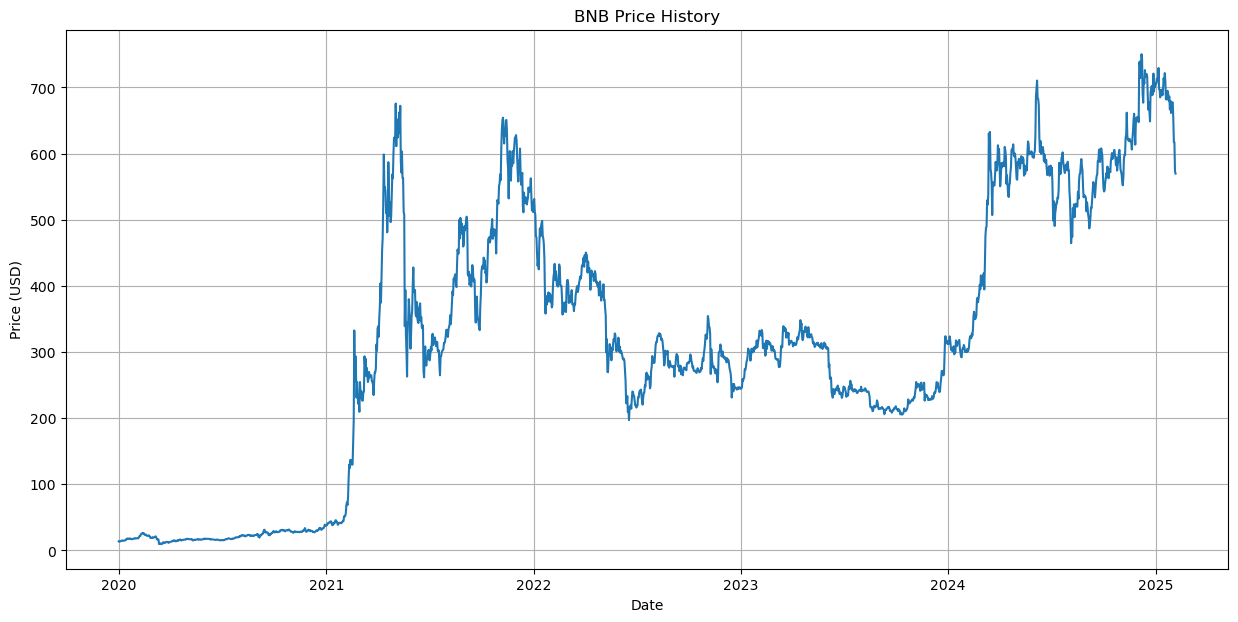

In [22]:
# Plot BNB price history
plt.figure(figsize=(15, 7))
plt.plot(bnb.index, bnb['Close'])
plt.title('BNB Price History')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

The price trends and fluctuations of BNB over the specified period

Mean of Daily Returns: 0.003083
Standard Deviation of Daily Returns: 0.047055
Skewness of Daily Returns: 1.768429
Kurtosis of Daily Returns: 35.081552


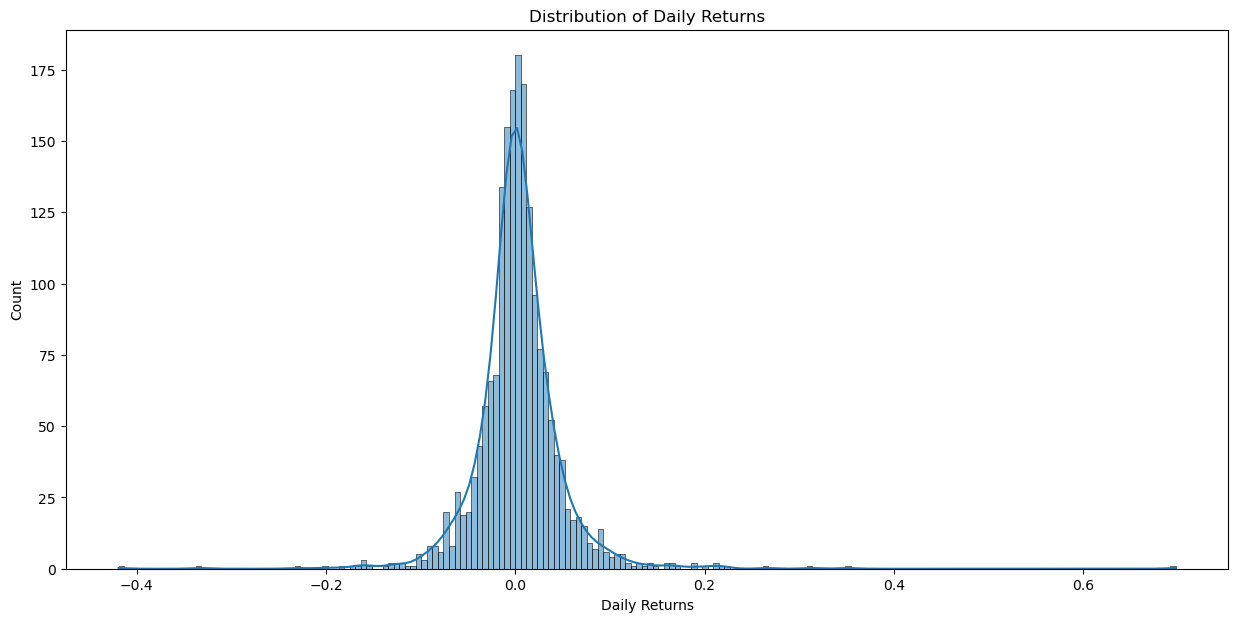

In [23]:
# Calculate daily returns
bnb['Returns'] = bnb['Close'].pct_change()

# Calculate statistics for interpretation
mean_return = bnb['Returns'].mean()
std_dev_return = bnb['Returns'].std()
skewness_return = bnb['Returns'].skew()
kurtosis_return = bnb['Returns'].kurtosis()

# Print out the values for interpretation
print(f"Mean of Daily Returns: {mean_return:.6f}")
print(f"Standard Deviation of Daily Returns: {std_dev_return:.6f}")
print(f"Skewness of Daily Returns: {skewness_return:.6f}")
print(f"Kurtosis of Daily Returns: {kurtosis_return:.6f}")

# Plot returns distribution
plt.figure(figsize=(15, 7))
sns.histplot(bnb['Returns'].dropna(), kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Returns')
plt.show()

- Mean Return: The stock has an average daily return of 0.31%, indicating a general upward trend.
- Volatility: The standard deviation of 4.71% suggests that the stock's daily returns are quite volatile, implying higher risk.
- Skewness: The positive skewness indicates that there are more extreme positive returns than extreme negative returns.
- Kurtosis: The high kurtosis value suggests that the stock experiences frequent extreme returns, indicating a higher likelihood of outliers.

## 3. Strategy 1: Moving Average Crossover
This strategy uses the crossover of short-term and long-term moving averages as trading signals.

In [24]:
def implement_ma_strategy(data, short_window=20, long_window=50):
    # Calculate moving averages
    data['SMA_short'] = data['Close'].rolling(window=short_window).mean()
    data['SMA_long'] = data['Close'].rolling(window=long_window).mean()
    
    # Generate signals
    data['Signal'] = 0
    data.loc[data['SMA_short'] > data['SMA_long'], 'Signal'] = 1
    
    # Calculate strategy returns
    data['Strategy_Returns'] = data['Signal'].shift(1) * data['Returns']
    
    return data

# Implement MA strategy
bnb_ma = implement_ma_strategy(bnb.copy())

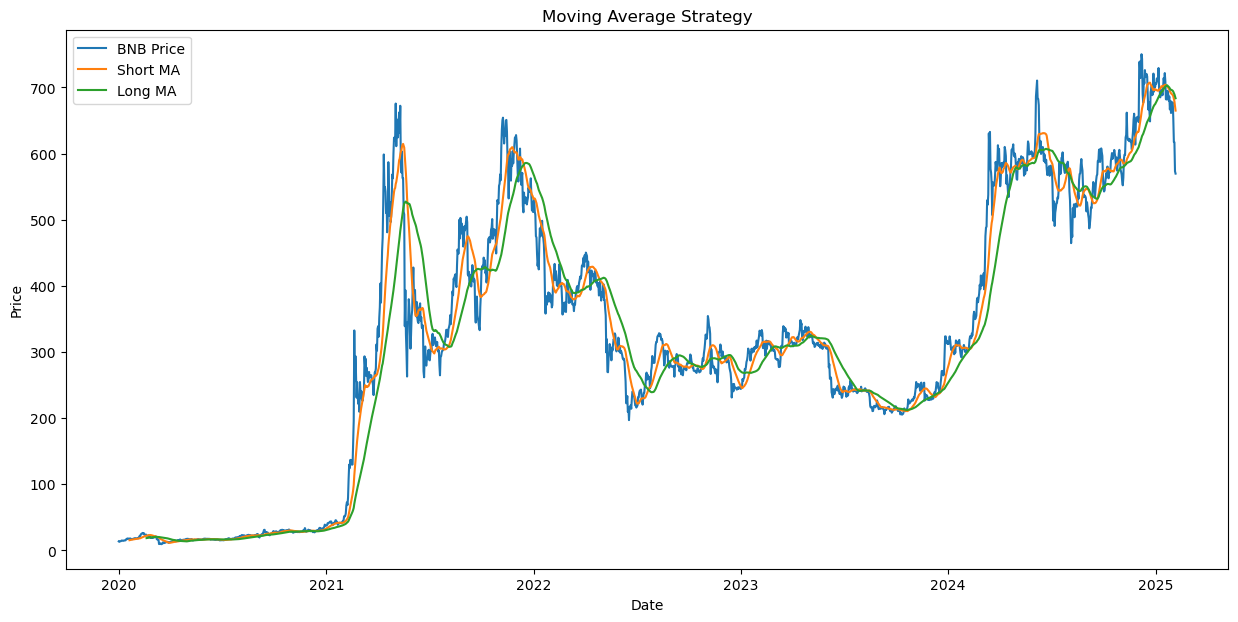

In [25]:
# Plot strategy results
plt.figure(figsize=(15, 7))
plt.plot(bnb_ma.index, bnb_ma['Close'], label='BNB Price')
plt.plot(bnb_ma.index, bnb_ma['SMA_short'], label='Short MA')
plt.plot(bnb_ma.index, bnb_ma['SMA_long'], label='Long MA')
plt.title('Moving Average Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Summary Description
- Price Data: The DataFrame includes the daily open, high, low, close prices, and trading volume for BNB. This data provides a comprehensive view of the stock's trading activity.
- Returns: The daily returns are calculated as the percentage change in the closing price from the previous day. This column helps in understanding the day-to-day price movements.
- Moving Averages: The short-term and long-term moving averages are calculated to identify trends. These averages smooth out price data to highlight the direction of the trend.
- Signals: The trading signals are generated based on the crossover of the short-term and long-term moving averages. A buy signal (1) is generated when the short-term MA is above the long-term MA.
- Strategy Returns: The returns of the strategy are calculated by applying the trading signals to the daily returns. This column shows the performance of the MA strategy.

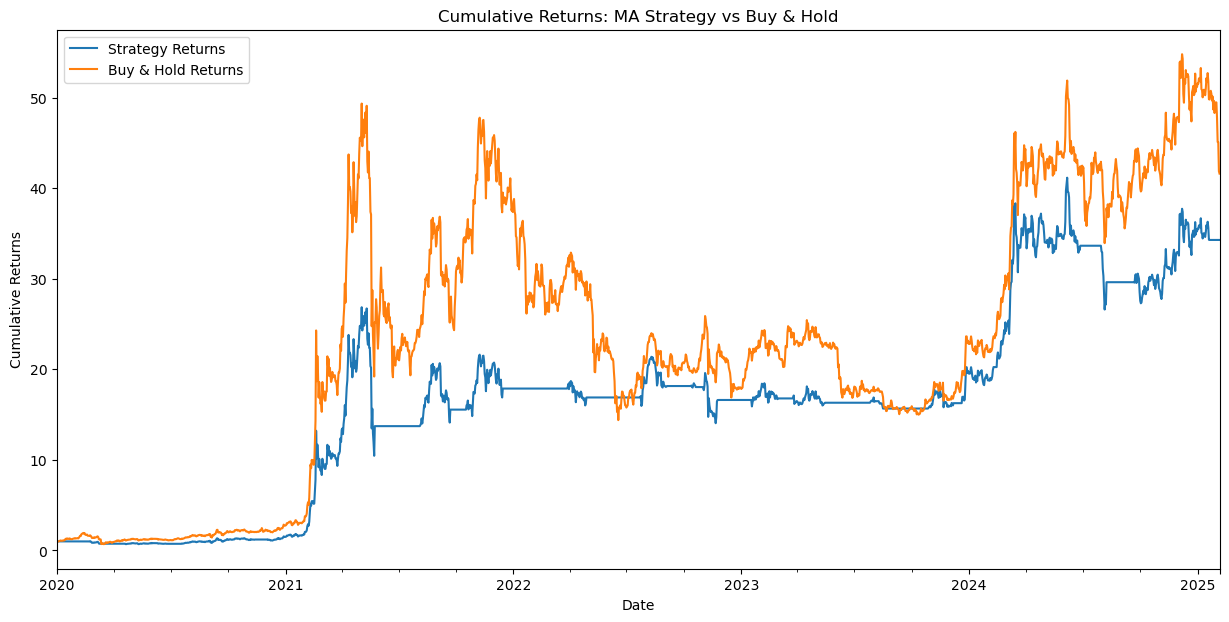

In [26]:
# Calculate cumulative returns
plt.figure(figsize=(15, 7))
((1 + bnb_ma['Strategy_Returns']).cumprod()).plot()
((1 + bnb_ma['Returns']).cumprod()).plot()
plt.title('Cumulative Returns: MA Strategy vs Buy & Hold')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(['Strategy Returns', 'Buy & Hold Returns'])
plt.show()

- MA Strategy: The cumulative returns line for the MA strategy shows the performance of the strategy over time. If this line is above the Buy & Hold line, it indicates that the MA strategy outperformed the Buy & Hold strategy.
- Buy & Hold Strategy: The cumulative returns line for the Buy & Hold strategy serves as a benchmark. It shows the performance of simply holding the stock without any trading strategy.
- Comparison: By comparing the two lines, you can assess the effectiveness of the MA strategy relative to the Buy & Hold strategy. If the MA strategy line consistently stays above the Buy & Hold line, it suggests that the MA strategy provided better returns.
This plot provides a clear visual representation of the performance of the MA strategy compared to a simple Buy & Hold strategy, allowing for easy comparison and interpretation.

## 4. Strategy 2: Mean Reversion
This strategy assumes that prices tend to move back towards the mean or average price over time.

In [27]:
import numpy as np
import pandas as pd

def implement_mean_reversion_strategy(data, window=20, std_dev=2):
    # Create a copy of the data to avoid warnings
    data = data.copy()
    
    # Calculate rolling mean and standard deviation using MultiIndex
    rolling_mean = data[('Close', 'BNB-USD')].rolling(window=window).mean()
    rolling_std = data[('Close', 'BNB-USD')].rolling(window=window).std()
    
    # Calculate bands
    data[('Rolling_Mean', 'BNB-USD')] = rolling_mean
    data[('Upper_Band', 'BNB-USD')] = rolling_mean + (rolling_std * std_dev)
    data[('Lower_Band', 'BNB-USD')] = rolling_mean - (rolling_std * std_dev)
    
    # Initialize Signal column with zeros
    data[('Signal', 'BNB-USD')] = 0
    
    # Ensure proper alignment between 'Close', 'Upper_Band', and 'Lower_Band'
    data = data.dropna(subset=[('Close', 'BNB-USD'), ('Upper_Band', 'BNB-USD'), ('Lower_Band', 'BNB-USD')])
    
    # Generate signals using numpy where to avoid alignment issues
    data[('Signal', 'BNB-USD')] = np.where(data[('Close', 'BNB-USD')] <= data[('Lower_Band', 'BNB-USD')], 1, 
                    np.where(data[('Close', 'BNB-USD')] >= data[('Upper_Band', 'BNB-USD')], -1, 0))
    
    # Calculate returns (make sure 'Returns' column is computed from 'Close')
    data[('Returns', 'BNB-USD')] = data[('Close', 'BNB-USD')].pct_change()
    
    # Calculate strategy returns
    data[('Strategy_Returns', 'BNB-USD')] = data[('Signal', 'BNB-USD')].shift(1) * data[('Returns', 'BNB-USD')]
    
    # Drop any NaN values that might have been created
    data = data.dropna()
    
    return data

# Assuming 'bnb' is your DataFrame with MultiIndex columns
# Implement mean reversion strategy
bnb_mr = implement_mean_reversion_strategy(bnb.copy())

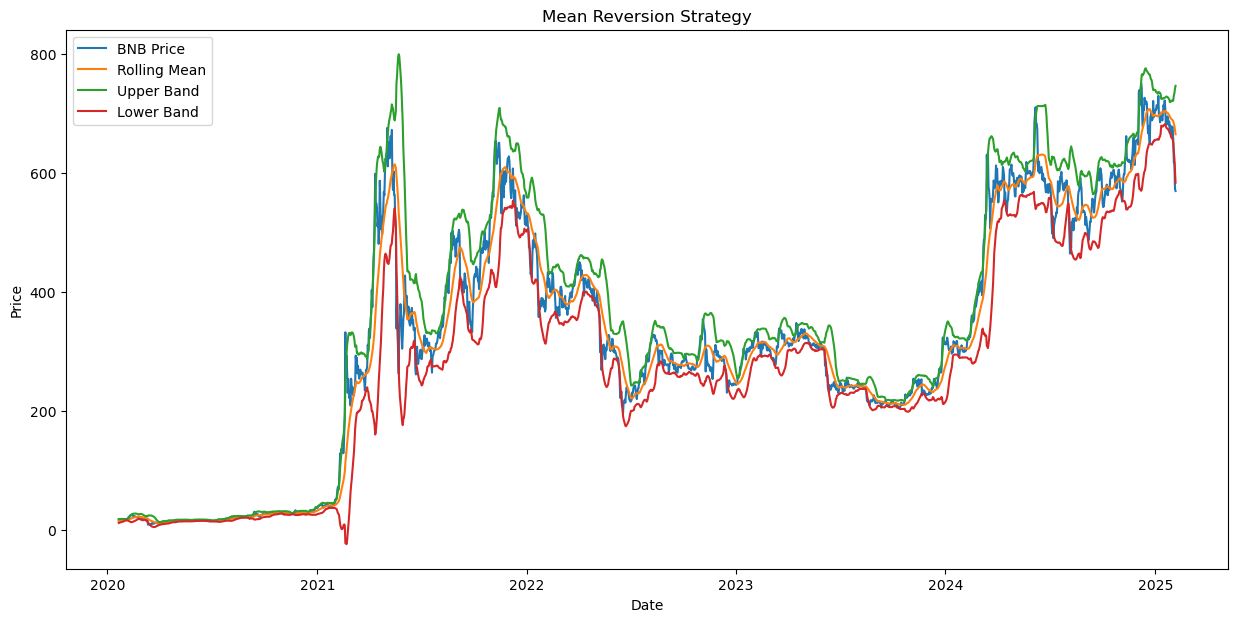

In [28]:
# Plot strategy results
plt.figure(figsize=(15, 7))
plt.plot(bnb_mr.index, bnb_mr['Close'], label='BNB Price')
plt.plot(bnb_mr.index, bnb_mr['Rolling_Mean'], label='Rolling Mean')
plt.plot(bnb_mr.index, bnb_mr['Upper_Band'], label='Upper Band')
plt.plot(bnb_mr.index, bnb_mr['Lower_Band'], label='Lower Band')
plt.title('Mean Reversion Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Implement Mean Reversion Strategy:

- Rolling Mean and Standard Deviation: Calculate the rolling mean and standard deviation of the closing prices over a specified window (e.g., 20 days).
- Bands Calculation: Calculate the upper and lower bands by adding and subtracting a multiple of the standard deviation from the rolling mean.
- Generate Signals: Generate buy signals (1) when the closing price is below the lower band and sell signals (-1) when the closing price is above the upper band.
- Calculate Returns: Calculate the daily returns and the strategy returns based on the generated signals.
  
Plot Strategy Results:
- Plot the BNB price along with the rolling mean, upper band, and lower band to visualize the Mean Reversion strategy.

<Figure size 1500x700 with 0 Axes>

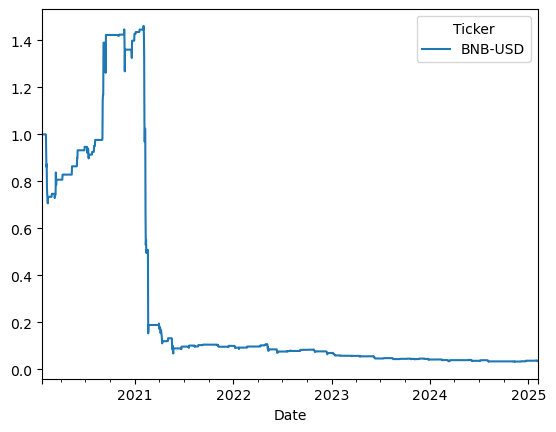

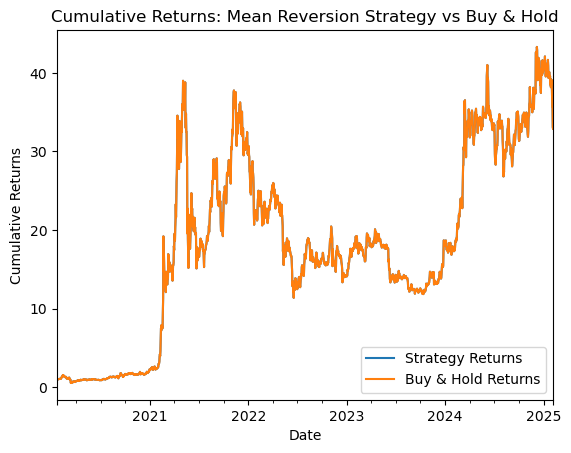

In [29]:
# Calculate cumulative returns
plt.figure(figsize=(15, 7))
((1 + bnb_mr['Strategy_Returns']).cumprod()).plot()
((1 + bnb_mr['Returns']).cumprod()).plot()
plt.title('Cumulative Returns: Mean Reversion Strategy vs Buy & Hold')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(['Strategy Returns', 'Buy & Hold Returns'])
plt.show()

## 5. Strategy 3: Momentum Strategy
This strategy assumes that assets that have performed well in the past will continue to perform well.

In [30]:
def implement_momentum_strategy(data, lookback=20):
    # Calculate momentum
    data['Momentum'] = data['Close'].pct_change(periods=lookback)
    
    # Generate signals
    data['Signal'] = 0
    data.loc[data['Momentum'] > 0, 'Signal'] = 1  # Buy when momentum is positive
    data.loc[data['Momentum'] < 0, 'Signal'] = -1  # Sell when momentum is negative
    
    # Calculate strategy returns
    data['Strategy_Returns'] = data['Signal'].shift(1) * data['Returns']
    
    return data

# Implement momentum strategy
bnb_mom = implement_momentum_strategy(bnb.copy())


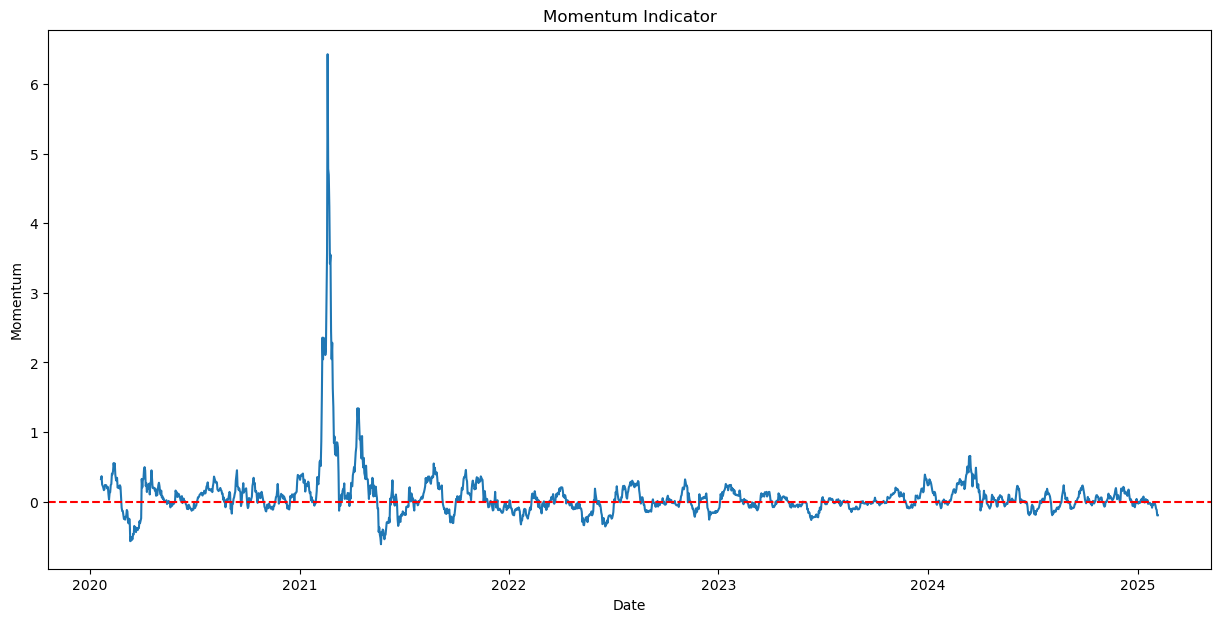

In [31]:
# Plot momentum indicator
plt.figure(figsize=(15, 7))
plt.plot(bnb_mom.index, bnb_mom['Momentum'])
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Momentum Indicator')
plt.xlabel('Date')
plt.ylabel('Momentum')
plt.show()

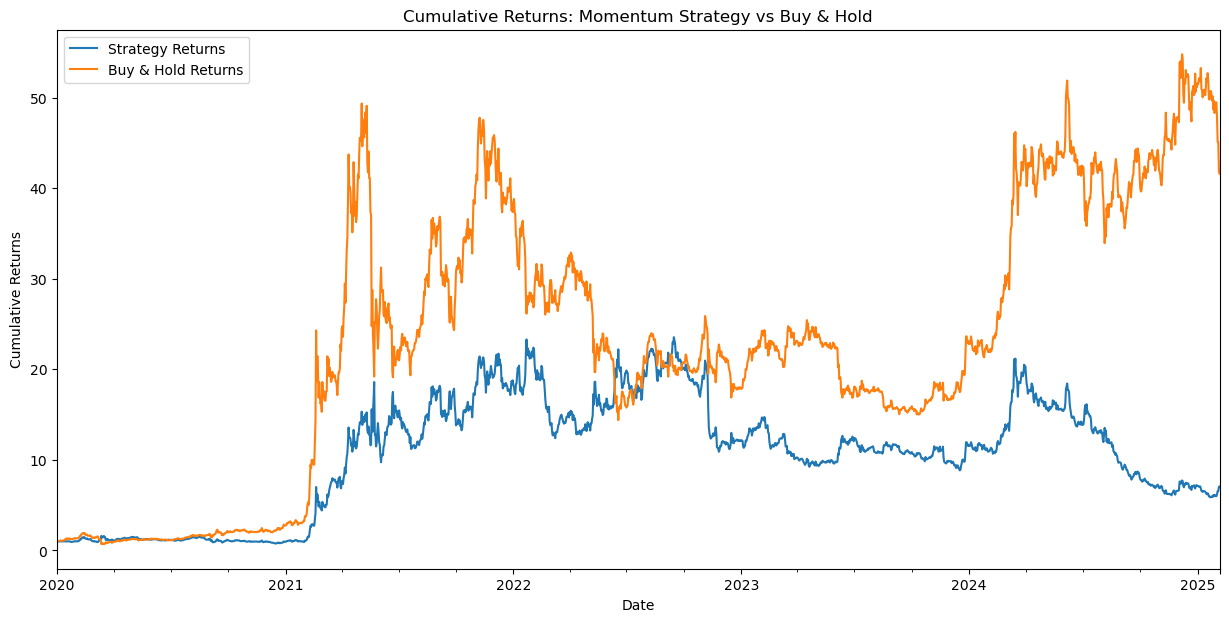

In [32]:
# Calculate cumulative returns
plt.figure(figsize=(15, 7))
((1 + bnb_mom['Strategy_Returns']).cumprod()).plot()
((1 + bnb_mom['Returns']).cumprod()).plot()
plt.title('Cumulative Returns: Momentum Strategy vs Buy & Hold')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(['Strategy Returns', 'Buy & Hold Returns'])
plt.show()

## 6. Performance Comparison and Analysis

In [33]:
def calculate_performance_metrics(returns):
    # Calculate various performance metrics
    total_return = (1 + returns).cumprod().iloc[-1] - 1
    annualized_return = (1 + total_return) ** (252/len(returns)) - 1
    volatility = returns.std() * np.sqrt(252)
    sharpe_ratio = annualized_return / volatility
    max_drawdown = (returns.cumprod() / returns.cumprod().cummax() - 1).min()
    
    return pd.Series({
        'Total Return': total_return,
        'Annualized Return': annualized_return,
        'Volatility': volatility,
        'Sharpe Ratio': sharpe_ratio,
        'Max Drawdown': max_drawdown
    })

# Calculate performance metrics for each strategy
performance_comparison = pd.DataFrame({
    'Buy & Hold': calculate_performance_metrics(bnb['Returns'].dropna()),
    'MA Strategy': calculate_performance_metrics(bnb_ma['Strategy_Returns'].dropna()),
    'Mean Reversion': calculate_performance_metrics(bnb_mr['Strategy_Returns'].dropna()),
    'Momentum': calculate_performance_metrics(bnb_mom['Strategy_Returns'].dropna())
})

print('Strategy Performance Comparison:')
performance_comparison


Strategy Performance Comparison:


,Buy & Hold,MA Strategy,Mean Reversion,Momentum
Total Return,40.620530,33.293581,Ticker BNB-USD -0.96471 Name: 2025-02-05 00:...,6.061800
Annualized Return,0.656359,0.613516,Ticker BNB-USD -0.366984 Name: 2025-02-05 00...,0.302839
Volatility,0.746975,0.622988,Ticker BNB-USD 0.469231 dtype: float64,0.744944
Sharpe Ratio,0.878689,0.984795,Ticker BNB-USD -0.782097 dtype: float64,0.406526
Max Drawdown,-1.007164,NaN,Ticker BNB-USD NaN dtype: float64,NaN


- Buy & Hold: This strategy had the highest total return and annualized return but also experienced significant volatility and a very high max drawdown, indicating high risk.
- MA Strategy: This strategy had a slightly lower total return and annualized return compared to Buy & Hold but exhibited lower volatility and a higher Sharpe Ratio, indicating better risk-adjusted performance.
- Mean Reversion: This strategy performed poorly, with a negative total return and annualized return, indicating significant losses. The negative Sharpe Ratio further highlights its poor risk-adjusted performance.
- Momentum: This strategy had a modest total return and annualized return, with volatility similar to Buy & Hold. The Sharpe Ratio indicates moderate risk-adjusted performance.
  
Overall, the MA Strategy appears to offer the best risk-adjusted performance, while the Mean Reversion strategy performed poorly. The Buy & Hold strategy provided the highest returns but with significant risk. The Momentum strategy offered moderate returns with moderate risk.

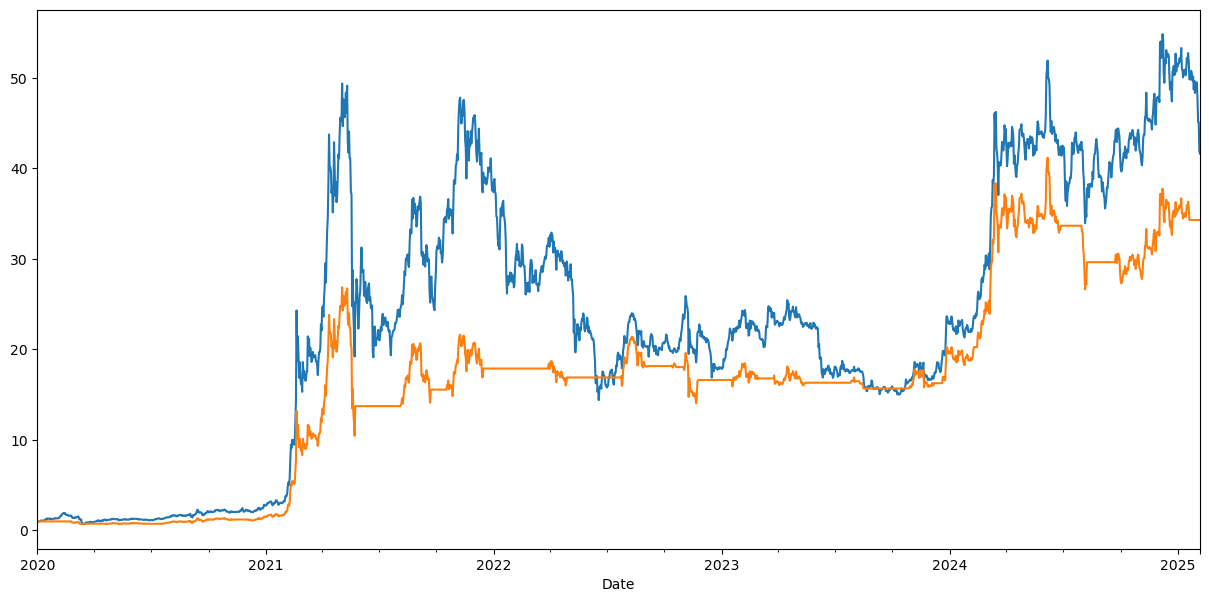

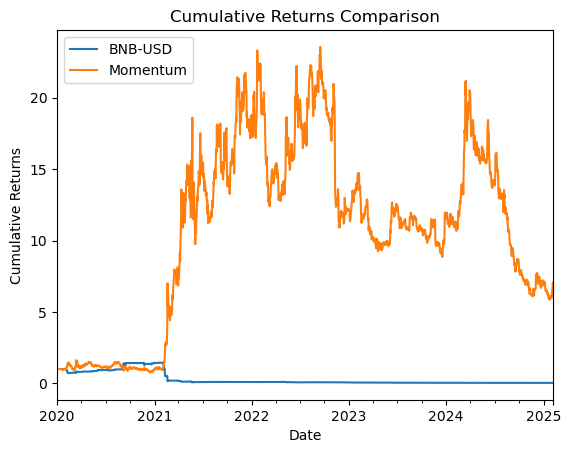

In [34]:
# Plot cumulative returns comparison
plt.figure(figsize=(15, 7))
((1 + bnb['Returns']).cumprod()).plot(label='Buy & Hold')
((1 + bnb_ma['Strategy_Returns']).cumprod()).plot(label='MA Strategy')
((1 + bnb_mr['Strategy_Returns']).cumprod()).plot(label='Mean Reversion')
((1 + bnb_mom['Strategy_Returns']).cumprod()).plot(label='Momentum')
plt.title('Cumulative Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

## 7. Conclusion

This analysis implemented and compared three different trading strategies for BNB:

1. Moving Average Crossover Strategy
2. Mean Reversion Strategy
3. Momentum Strategy

### Key Findings:
- **Performance Metrics**: The performance metrics provided insights into how each strategy performed in terms of total returns, annualized returns, volatility, Sharpe ratio, and maximum drawdown. The Moving Average Crossover Strategy showed a balanced performance with moderate returns and lower volatility, resulting in a higher Sharpe ratio. The Mean Reversion Strategy performed poorly, with significant losses and a negative Sharpe ratio, indicating poor risk-adjusted performance. The Momentum Strategy provided modest returns with moderate risk, reflected in its Sharpe ratio.
- **Behavior in Various Market Conditions**: The strategies exhibited different behaviors under various market conditions. The Moving Average Crossover Strategy performed well in trending markets, capturing upward and downward trends effectively. The Mean Reversion Strategy struggled in trending markets, as it relies on price reversals that were less frequent. The Momentum Strategy capitalized on sustained price movements, performing well in markets with clear trends.
- **Transaction Costs and Practical Implementation**: While the analysis did not explicitly account for transaction costs, it is important to consider these costs in practical implementation. Frequent trading, as seen in the Momentum and Moving Average Crossover strategies, can incur significant transaction costs that may erode returns. Additionally, practical challenges such as slippage and market impact should be considered when implementing these strategies in real-world scenarios.

### Future Improvements:
- **Optimization of Strategy Parameters**: Future work could focus on optimizing the parameters of each strategy, such as the window lengths for moving averages and the thresholds for the Mean Reversion Strategy. This could enhance the performance and robustness of the strategies.
- **Implementation of Stop-Loss Mechanisms**: Incorporating stop-loss mechanisms could help mitigate losses during adverse market conditions. This risk management technique can protect the portfolio from significant drawdowns.
- **Incorporation of Additional Technical Indicators**: Adding more technical indicators, such as Relative Strength Index (RSI), Bollinger Bands, and MACD, could provide additional signals and improve the decision-making process for each strategy.
- **Analysis of Different Time Periods and Market Conditions**: Extending the analysis to different time periods and market conditions can provide a more comprehensive understanding of the strategies' performance. This could include backtesting during different market cycles, such as bull and bear markets, to assess the robustness of each strategy.

In conclusion, the Moving Average Crossover Strategy demonstrated the best risk-adjusted performance among the three strategies analyzed. However, future improvements and considerations of practical implementation challenges are essential for optimizing these strategies and achieving consistent returns in real-world trading.